In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Q1.1
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

print(df0_125)


          x1        x2 group
0   0.781279  0.851498     a
1   1.042835  0.931282     a
2   1.144129  0.882494     a
3   0.968445  0.896508     a
4   1.122665  1.013608     a
..       ...       ...   ...
45  5.144996  2.890534     c
46  5.087773  3.014701     c
47  4.839512  2.880229     c
48  5.190288  2.764861     c
49  4.977505  3.022793     c

[150 rows x 3 columns]


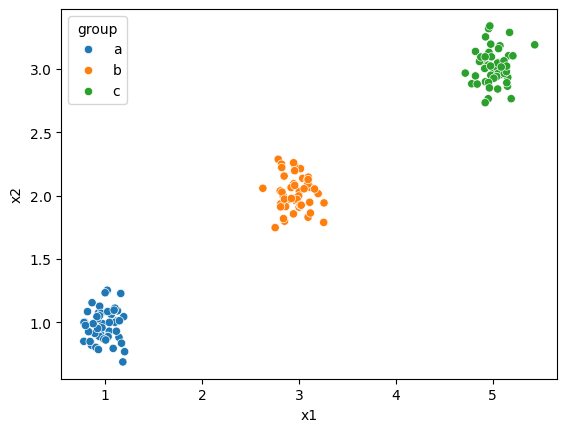

In [97]:
# Q1.2: scatterplots of the X1
plot_125 = sns.scatterplot(data = df0_125, x='x1', y='x2', hue = "group")
plt.show()

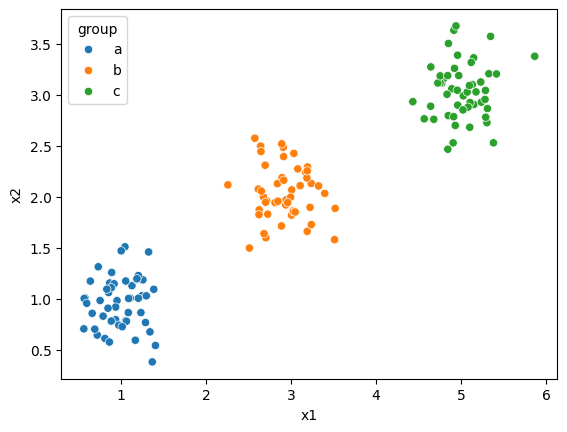

In [98]:
plot_25 = sns.scatterplot(data = df0_25, x='x1', y='x2', hue = "group")
plt.show()

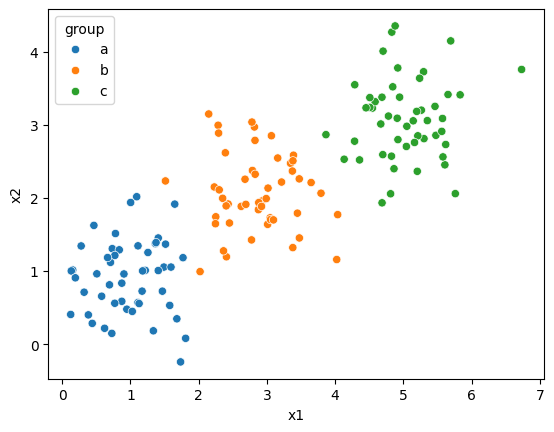

In [99]:
plot_5 = sns.scatterplot(data = df0_5, x='x1', y='x2', hue = "group")
plt.show()

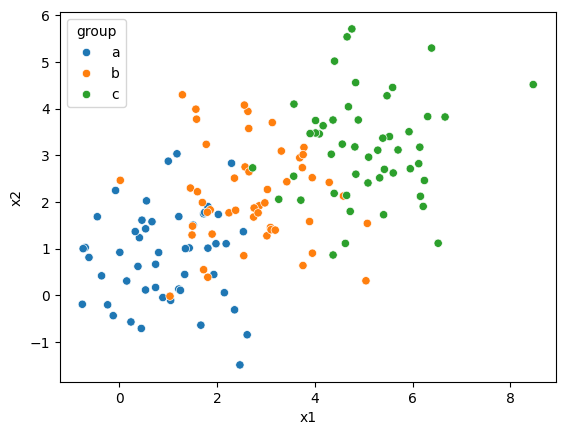

In [100]:
plot1_0 = sns.scatterplot(data = df1_0, x='x1', y='x2', hue = "group")
plt.show()

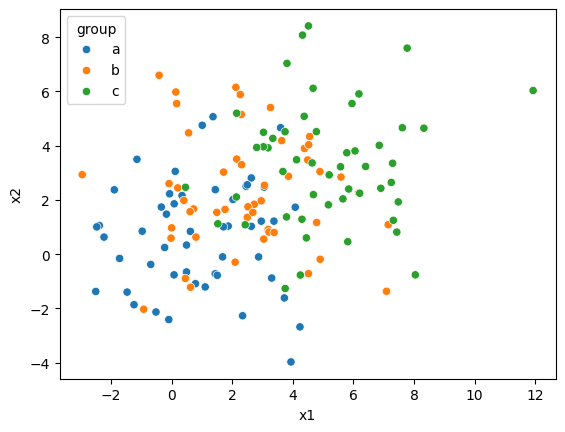

In [101]:
plot2_0 = sns.scatterplot(data = df2_0 , x='x1', y='x2', hue = "group")
plt.show()

In [4]:
# the visual distinctness of the clusters decreases significantly as the noise goes from 0.125 to 2.0

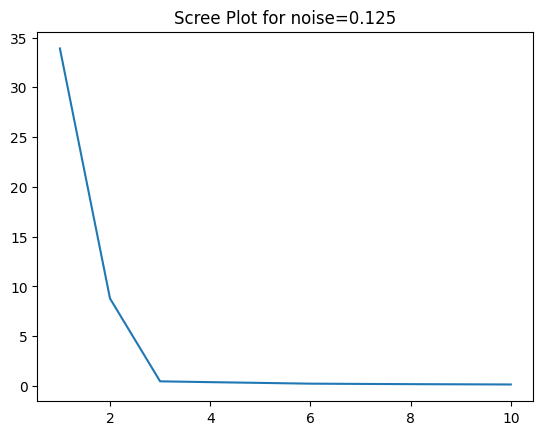

In [102]:
# Q1.3:
from sklearn.cluster import KMeans 

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return z

vars =  ['x1','x2']

X = df0_125.loc[:,vars]
X = X.apply(maxmin)

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot for noise=0.125')

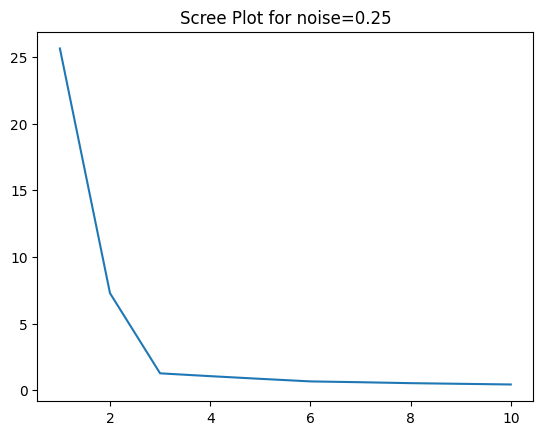

In [104]:
from sklearn.cluster import KMeans 

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return z

vars =  ['x1','x2']

X = df0_25.loc[:,vars]
X = X.apply(maxmin)

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot for noise=0.25')

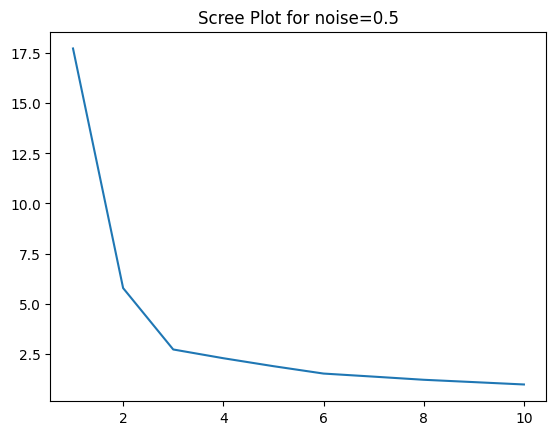

In [105]:
from sklearn.cluster import KMeans 

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return z

vars =  ['x1','x2']

X = df0_5.loc[:,vars]
X = X.apply(maxmin)

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot for noise=0.5')

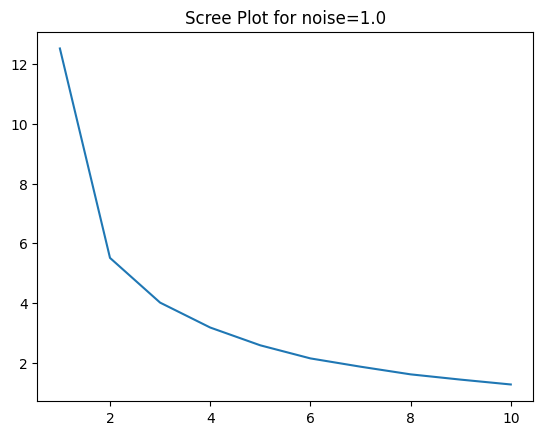

In [107]:
from sklearn.cluster import KMeans 

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return z

vars =  ['x1','x2']

X = df1_0.loc[:,vars]
X = X.apply(maxmin)

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot for noise=1.0')

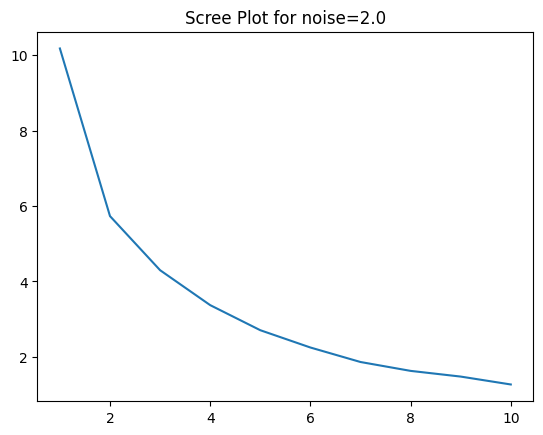

In [108]:
from sklearn.cluster import KMeans 

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return z

vars =  ['x1','x2']

X = df2_0.loc[:,vars]
X = X.apply(maxmin)

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot for noise=2.0')

In [34]:
# As the noise increases, the elbow becomes less distinct, thereby also making 
# it more challenging to definitively select a k. 

In [ ]:
#Q1.4

# The elbow in a scree plot is the point at which the reduction in SSE of going
# from k-1 to k drops significantly cokmpared to k to k+1. At this point, 
# adding an additional cluster does not really improve the fit. When there is
# no elbow, it could be because there aren't any discrete clusters. In this 
# case, as the noise in the data increases, the distinctions between clusters
# drastically decreases, almost to the point where there really aren't that
# clear of clusters. This is visible in both the scatterplots as well as the 
# scree plots. 



In [109]:
#Q2.1

df = pd.read_csv("data/2022 election cycle fundraising.csv")

# git rid of commas
df['Raised']=df['Raised'].str.replace(",","")
df['Spent']=df['Spent'].str.replace(",","")
df['Cash on Hand']=df['Cash on Hand'].str.replace(",","")
df['Debts']=df['Debts'].str.replace(",","")

# git rid of dollar signs
df['Raised']=df['Raised'].str.replace("$","")
df['Spent']=df['Spent'].str.replace("$","")
df['Cash on Hand']=df['Cash on Hand'].str.replace("$","")
df['Debts']=df['Debts'].str.replace("$","")

# address missing values
df['Raised']=df['Raised'].replace("","np.nan")
df['Spent']=df['Spent'].replace("","np.nan")
df['Cash on Hand']=df['Cash on Hand'].replace("","np.nan")
df['Debts']=df['Debts'].replace("","np.nan")

# force to numeric
df['Raised']=pd.to_numeric(df['Raised'],errors='coerce')
df['Spent']=pd.to_numeric(df['Spent'],errors='coerce')
df['Cash on Hand']=pd.to_numeric(df['Cash on Hand'],errors='coerce')
df['Debts']=pd.to_numeric(df['Debts'],errors='coerce')

In [110]:
# Q2.2
# maxmnin Raised and spent
X = df.loc[:,['Raised','Spent']]
X = X.apply(maxmin)
print(X.head(5))

     Raised     Spent
0  0.103512  0.098074
1  0.040686  0.016371
2  0.254404  0.183753
3  0.029527  0.015449
4  0.034148  0.021915


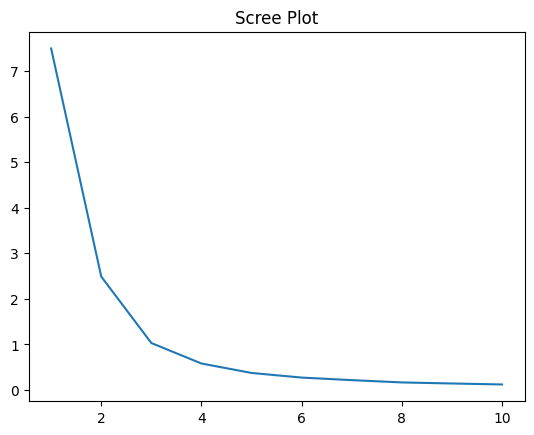

In [112]:
#scree plot

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')
# optimal k means is k=3

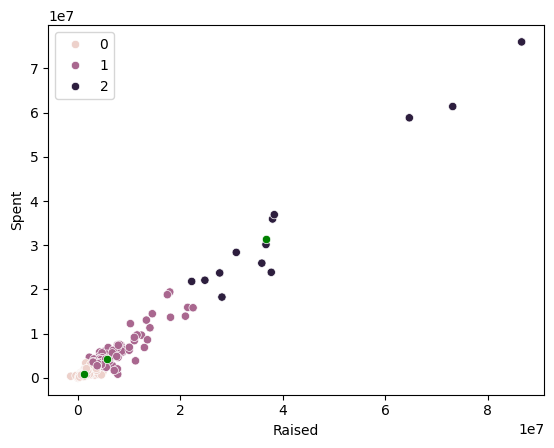

In [116]:
# scatterplot
max_x1 = max(df.loc[:,'Raised'])
min_x1 = min(df.loc[:,'Raised'])
max_x2 = max(df.loc[:,'Spent'])
min_x2 = min(df.loc[:,'Spent'])

np.random.seed(10)
initial_centroids = np.random.randint(low=1,high=X.shape[0],size=3) # Determine initial centroids
model = KMeans(n_clusters=3, max_iter=5, 
               init = X.iloc[initial_centroids,:],random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
df['g_hat'] = model.predict(X)

centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
this_plot = sns.scatterplot(data=df,x='Raised',y='Spent',
                            hue='g_hat')
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='green')
plt.show()

# Most politicians fall within the smallest two clusters. 

In [123]:
pd.crosstab(df["g_hat"], df["Party"])

Party,Democratic,Independent,Republican
g_hat,,,
0,199,1,206
1,67,1,50
2,8,0,5


In [124]:
pd.crosstab(df["g_hat"], df["State"])

State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
g_hat,,,,,,,,,,,,,,,,,,,,,
0,8,2,1,8,4,43,7,6,3,1,...,11,32,5,1,1,11,8,3,8,3
1,1,1,0,2,2,10,2,1,0,0,...,0,6,1,2,0,2,4,2,1,0
2,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [125]:
pd.crosstab(df["g_hat"], df["Chamber"])

Chamber,House,Senate
g_hat,,
0,343,63
1,85,33
2,4,9


In [126]:
pd.crosstab(df["g_hat"], df["Member"])

Member,Abigail Spanberger,Adam Kinzinger,Adam Schiff,Adam Smith,Adrian Smith,Adriano Espaillat,Al Green,Al Lawson,Alan Lowenthal,Albio Sires,...,Vicente Gonzalez,Vicky Hartzler,Victoria Spartz,Virginia Foxx,Warren Davidson,William Timmons,Young Kim,Yvette Clarke,Yvette Herrell,Zoe Lofgren
g_hat,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# The lowest cluster (cluster 0) is relatively evenly split between republicans and democrats. The second group is a slightly larger split (17 compared
# to 7) while the third cluster is once again pretty evenly split. When crosstabulated by state, the first group appears to have a larger proportion of
# representatives from California and Texas. When crosstabulated by chamber, the first cluster has the most counts for both, the second cluster has
# the second most, and the third cluster has the least. Some politicians that make up the first cluster are Al Green, Alan Lowenthal, and William 
# Timmons. Politicians in the second cluster include Vicky Hartzler and Adam Smith. Al Green ran unopposed, Alan Lowenthal won against Cesar 
# Castellanos at a 60/40 split, and Vicky Hartzler won against Ike Skelton in a very tight race, winning 50.4% of the vote. 

In [127]:
# Q2.3:
X = df.loc[:,['Cash on Hand','Debts']]
X = X.apply(maxmin)
print(X.head(5))

   Cash on Hand  Debts
0      0.040154    0.0
1      0.111166    0.0
2      0.920268    0.0
3      0.030150    0.0
4      0.050962    0.0


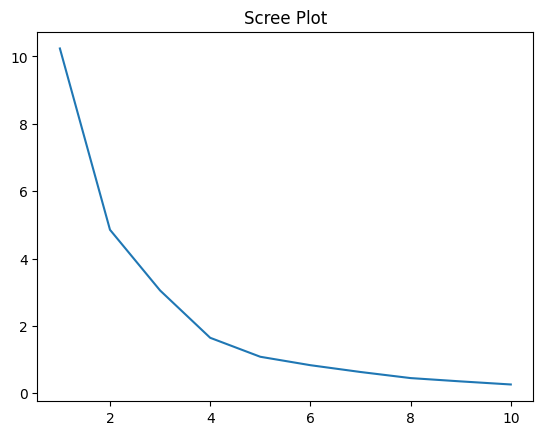

In [128]:
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')
# optimal k means is k=4

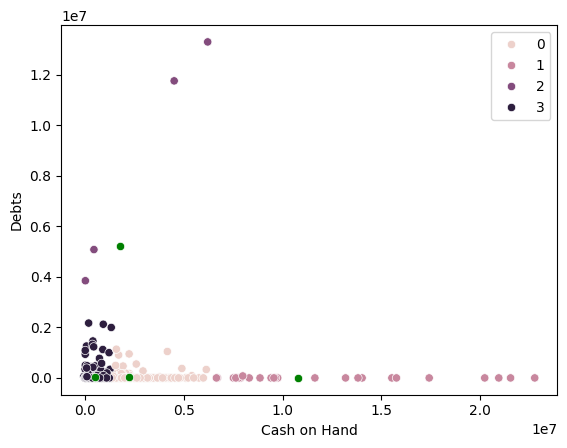

In [130]:
max_x1 = max(df.loc[:,'Cash on Hand'])
min_x1 = min(df.loc[:,'Cash on Hand'])
max_x2 = max(df.loc[:,'Debts'])
min_x2 = min(df.loc[:,'Debts'])

np.random.seed(10)
initial_centroids = np.random.randint(low=1,high=X.shape[0],size=4) # Determine initial centroids
model = KMeans(n_clusters=4, max_iter=5, 
               init = X.iloc[initial_centroids,:],random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
df['g_hat'] = model.predict(X)

centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
this_plot = sns.scatterplot(data=df,x='Cash on Hand',y='Debts',
                            hue='g_hat')
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='green')
plt.show()


In [133]:
pd.crosstab(df["g_hat"], df["Party"])

Party,Democratic,Independent,Republican
g_hat,,,
0,99,0,67
1,14,1,11
2,2,0,2
3,159,1,181


In [134]:
pd.crosstab(df["g_hat"], df["Chamber"])

Chamber,House,Senate
g_hat,,
0,118,48
1,8,18
2,3,1
3,303,38


In [135]:
pd.crosstab(df["g_hat"], df["State"])

State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
g_hat,,,,,,,,,,,,,,,,,,,,,
0,2,2,0,2,2,19,4,4,2,0,...,4,9,1,2,0,5,6,1,3,1
1,1,0,0,2,1,5,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,1,1,7,3,30,5,3,1,1,...,7,29,5,0,1,8,6,3,6,2


In [136]:
pd.crosstab(df["g_hat"], df["Member"])

Member,Abigail Spanberger,Adam Kinzinger,Adam Schiff,Adam Smith,Adrian Smith,Adriano Espaillat,Al Green,Al Lawson,Alan Lowenthal,Albio Sires,...,Vicente Gonzalez,Vicky Hartzler,Victoria Spartz,Virginia Foxx,Warren Davidson,William Timmons,Young Kim,Yvette Clarke,Yvette Herrell,Zoe Lofgren
g_hat,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1


In [ ]:
# The groups in this scree plot appear to be less obvious. When crosstabulated by party, most republicans and democrats are in the first or fourth 
# cluster. After that, most are in the first cluster. The third cluster is by far the smallest. When crosstabulating by chamber, most of the 
# representatives from the house are in the fourth cluster, while for the Senate, the largest portion of them are in the first cluster. Adam Kinzinger
# is in the first cluster, Adam Schiff is in the second. According to google, hwoever, Kinzinger did not run for election in 2022, so whether or not 
# this data set is entirely accurate is an important consideration. Schiff won against Maebe A. Girl, receiving 71.1% of the vote.

In [149]:
#Q2.4:

X = df.loc[:,['Raised','Spent','Cash on Hand','Debts']]
X = X.apply(maxmin)
print(X.head(5))

     Raised     Spent  Cash on Hand  Debts
0  0.103512  0.098074      0.040154    0.0
1  0.040686  0.016371      0.111166    0.0
2  0.254404  0.183753      0.920268    0.0
3  0.029527  0.015449      0.030150    0.0
4  0.034148  0.021915      0.050962    0.0


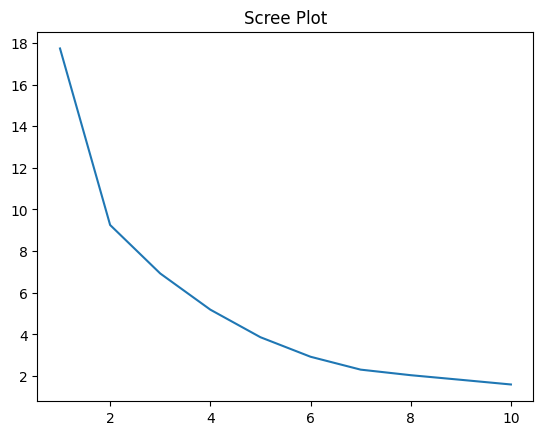

In [150]:
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')
# optimal k means is k=4

In [159]:
np.random.seed(10)
initial_centroids = np.random.randint(low=1,high=X.shape[0],size=2) # Determine initial centroids
model = KMeans(n_clusters=2, max_iter=5, 
               init = X.iloc[initial_centroids,:],random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
df['g_hat'] = model.predict(X)

In [152]:
pd.crosstab(df["g_hat"], df["Party"])

Party,Democratic,Independent,Republican
g_hat,,,
0,254,1,247
1,20,1,14


In [153]:
pd.crosstab(df["g_hat"], df["Chamber"])

Chamber,House,Senate
g_hat,,
0,420,82
1,12,23


In [155]:
cluster_means_summary = df.groupby("g_hat")[["Raised", "Spent","Debts",'Cash on Hand']].mean()
print(cluster_means_summary)

             Raised         Spent          Debts  Cash on Hand
g_hat                                                         
0      2.251562e+06  1.800910e+06   84732.874502  1.216713e+06
1      2.282211e+07  1.828392e+07  731097.514286  1.001808e+07


In [156]:
cluster_median_summary = df.groupby("g_hat")[["Raised", "Spent","Debts",'Cash on Hand']].median()
print(cluster_median_summary)

           Raised       Spent  Debts  Cash on Hand
g_hat                                             
0       1616261.0   1160573.0    0.0      911510.0
1      17940130.0  13957854.0    0.0     7980477.0


In [ ]:
# Like the two previous parts, this clustering has most of the data within the first cluster. This can be seen when cross-
# tabulating across variables such as chamber and party. 

In [ ]:
# Q2.5: Did the k-MC algorithm find useful patterns for you in analyzing the election?
# Across the k-MC algorithm, it appears that most candidates fell within the first cluster (based on the crosstab above). When looking at averages for 
# the numeric variables as well as the medians, there are some discrepancies. For example, the average debt is about 85k for the first cluster and 731k
# for the second cluster, while the median debt for both is zero. This indicates the presence of pretty extreme outliers. Mean calculations are skewed 
# more by outliers than medians are. Thus, there appears to be a wide range of numeric data, but the majority of the data is towards the lower end.